<a href="https://colab.research.google.com/github/aish0606/DeepLearning/blob/main/Applications/App1_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FFNN - Application 1 - Diabetes**

ffnn - feed forward neural network

In [1]:
!git clone https://github.com/fawazsammani/The-Complete-Neural-Networks-Bootcamp-Theory-Applications.git

Cloning into 'The-Complete-Neural-Networks-Bootcamp-Theory-Applications'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 80 (delta 10), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (80/80), done.


In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
!cp /content/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/diabetes.csv /content/gdrive/MyDrive/Data/

In [4]:
import numpy as np
import torch
import torch.nn as nn
# below 2 packages are used topreprocess the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
# to build our custom pytorch dataset we use the following
from torch.utils.data import Dataset

In [5]:
# Load the dataset using pd
data = pd.read_csv('/content/gdrive/MyDrive/Data/diabetes.csv')

In [6]:
# For x: Extract out the dataset from all the rows (all samples) and all columns except last column (all features). 
# For y: Extract out the last column (which is the label)
# Convert both to numpy using the .values method
x = data.iloc[:, 0:-1].values
y_string = data.iloc[:, -1].values

In [7]:
# Lets have a look some samples from our data
print(x[:3]) # this will show 3 ROWS with ALL COLUMNS
print(y_string[:3])

[[  6.  148.   72.   35.    0.   33.6  50. ]
 [  1.   85.   66.   29.    0.   26.6  31. ]
 [  8.  183.   64.    0.    0.   23.3  32. ]]
['positive' 'negative' 'positive']


In [8]:
# Our neural network only understand numbers! So convert the string to labels
yint = [1 if s == 'positive' else 0 for s in y_string]
print(yint)
print(len(yint))

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

In [9]:
# Now convert to an array (x val are float therefore we need to convert y to float)
y = np.array(yint, dtype='float64')


$x^{\prime}=\frac{x-\mu}{\sigma}$

In [10]:
# Normalization is a scaling technique:- https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e
# Feature Normalization. All features should have the same range of values (-1,1)
sc = StandardScaler()
x = sc.fit_transform(x)
print(x[:2])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.19067191]]


In [11]:
# Now we convert the arrays to PyTorch tensors
x = torch.tensor(x)
print(x.shape)
y = torch.tensor(y)
print(y.shape)
# y = torch.unsqueeze(y, dim=1) # OR
# unsqueeze is used to add dimension in tensor
y = y.unsqueeze(1)
y.shape

torch.Size([768, 7])
torch.Size([768])


torch.Size([768, 1])

In [12]:
# Build our own PYTORCH custom dataset

# Inheriting the built-in class Dataset
# Override the inbuilt method of class Datasetfrom torch.utils.data
class Dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __getitem__(self, index):
    return (self.x[index], self.y[index])
  def __len__(self):
    return len(self.x)

In [13]:
dataset = Dataset(x, y)
print(len(dataset))

768


In [14]:
# Load the data to your dataloader for batch processing and shuffling
train_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [15]:
print(type(train_loader))
print(len(train_loader))
print(dir(train_loader))

torch.utils.data.dataloader.DataLoader
24
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__abstractmethods__', '__annotations__', '__args__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__extra__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next_in_mro__', '__orig_bases__', '__origin__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__tree_hash__', '__weakref__', '_abc_cache', '_abc_generic_negative_cache', '_abc_generic_negative_cache_version', '_abc_registry', '_auto_collation', '_dataset_kind', '_get_iterator', '_gorg', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persis

In [16]:
# Let's have a look at the data loader
print("there are {} batches in the data_loader".format(len(train_loader)))
for (x,y) in train_loader:
  print('For one iteration (or batch) there are')
  print('Data: {}'.format(x.shape))
  # print(x)
  print('Labels: {}'.format(y.shape))
  # print(y)
  break

there are 24 batches in the data_loader
For one iteration (or batch) there are
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])


In [17]:
no_of_batches = 768/32
no_of_batches

24.0

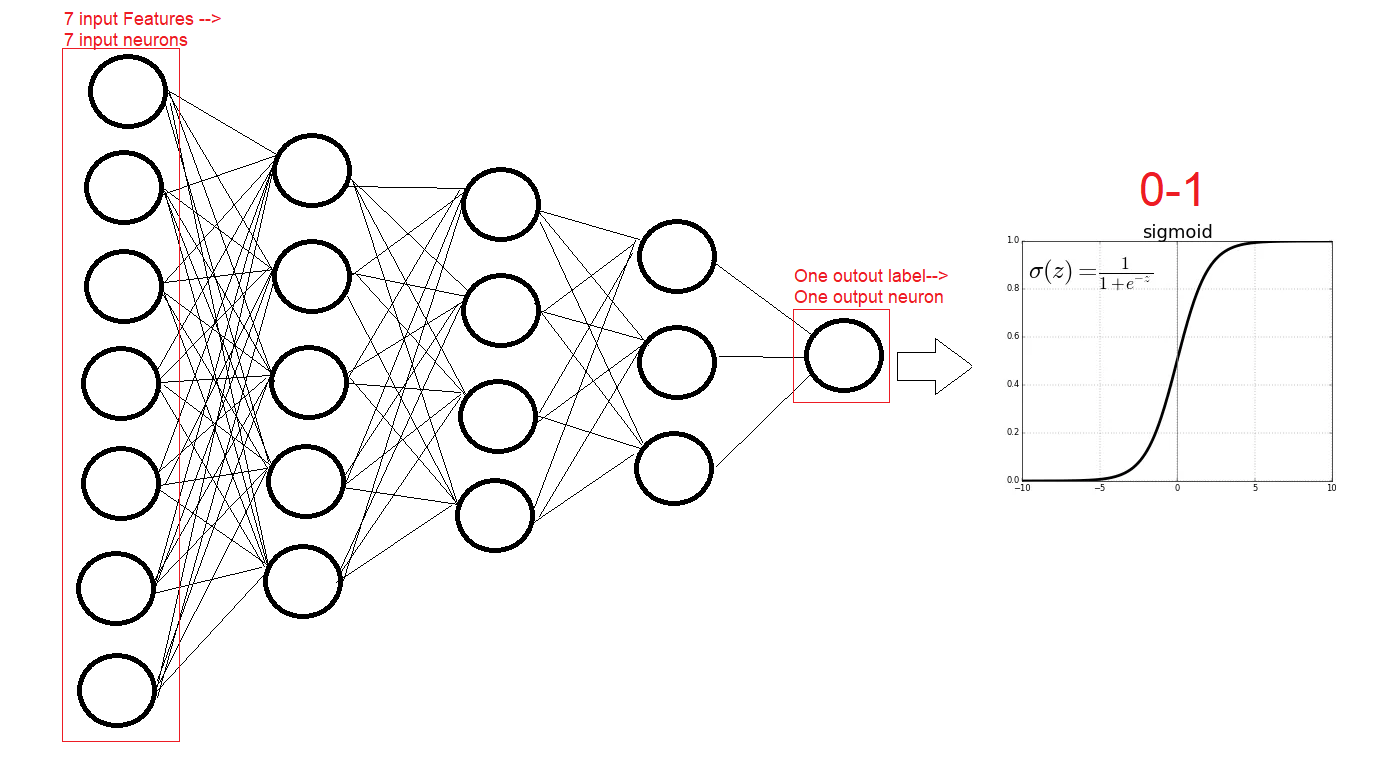

In [43]:
# Now let's build the above network
# Every class has attributes and functionality
# LAYERS are attributes
# Forward propogation method is functionality
class Model(nn.Module):
  """
  Here we are inheriting from nn.Module class.
  To inherit all the attribute and functionality to Model class
  we use the keyword "super" & pass 2 attributes -- 
  1. the name of the child class which is Model, and
  2. the class keyword self

  Also, we can name the layer in 3 ways ---
  1. FC - Fully Connected Layer
  2. MLP - multi layer perceptron
  3. Linear Layer (In pytorch we say this that's why we use nn.Linear)
  """
  def __init__(self, input_features, output_features):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_features, 5)
    self.fc2 = nn.Linear(5, 4)
    self.fc3 = nn.Linear(4,3)
    self.fc4 = nn.Linear(3,output_features)
    # we r using 2 activation fn. Sigmoid for the output layer
    # as we have o/p as 0 & 1, therefore we will use BCE and 
    # for that o/p shd be passed through sigmoid fn
    self.sigmoid = nn.Sigmoid()
    # tanh for the hidden layers
    self.tanh = nn.Tanh()
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.tanh(out)
    out = self.fc2(out)
    out = self.tanh(out)
    out = self.fc3(out)
    out = self.tanh(out)
    out = self.fc4(out)
    out = self.sigmoid(out)
    return out





$H_{p}(q)=-\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log \left(p\left(y_{i}\right)\right)+\left(1-y_{i}\right) \cdot \log \left(1-p\left(y_{i}\right)\right)$

cost = -(Y torch.log(hypothesis) + (1 - Y) torch.log(1 - hypothesis)).mean()


In [44]:
# Create the network (an object of the Net class)
net = Model(7, 1)
# print(help(net.parameters()))
#In Binary Cross Entropy: the input and output should have the same shape 
#size_average = True --> the losses are averaged over observations for each minibatch
criterion = nn.BCELoss(size_average=True)  
# We will use SGD with momentum with a learning rate of 0.1
# nn.parameters() are the weights for ALL the layers
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [51]:
# Train the network 
num_epochs = 200
for epoch in range(num_epochs):
  for inputs, labels in train_loader:
    inputs = inputs.float()
    labels = labels.float()
    # Feed Forward
    # net.forward(inputs) can also be written as 
    output = net(inputs)
    # Loss Calc
    loss = criterion(output, labels)
    # Forward propogation has 3 rules in Pytorch
    # 1. Clear the Gradient buffer(as we don't want to accumulate gradients) [w <- w - lr*gradient]
    optimizer.zero_grad()
    # 2. Calculate the gradient (or BackProp)
    loss.backward()
    # 3. Weight update [w <- w - lr*gradient]
    optimizer.step()
  
  # Accuracy Calculation
  output = (output>0.5) # See the below cell to see what it does
  # Convert Bool to int using .long()
  output = output.long()
  # Accuracy : (output == labels).float().sum() / output.shape[0]
  accuracy = (output == labels).float().mean()
  # print Stats
  print('Epochs {} / {}. Loss: {:.3f}. Accuracy: {:.3f}'.format(epoch, num_epochs, loss, accuracy))

Epochs 0 / 200. Loss: 0.437. Accuracy: 0.656
Epochs 1 / 200. Loss: 0.336. Accuracy: 0.781
Epochs 2 / 200. Loss: 0.439. Accuracy: 0.844
Epochs 3 / 200. Loss: 0.457. Accuracy: 0.719
Epochs 4 / 200. Loss: 0.663. Accuracy: 0.781
Epochs 5 / 200. Loss: 0.442. Accuracy: 0.719
Epochs 6 / 200. Loss: 0.314. Accuracy: 0.875
Epochs 7 / 200. Loss: 0.396. Accuracy: 0.812
Epochs 8 / 200. Loss: 0.378. Accuracy: 0.781
Epochs 9 / 200. Loss: 0.403. Accuracy: 0.781
Epochs 10 / 200. Loss: 0.518. Accuracy: 0.719
Epochs 11 / 200. Loss: 0.386. Accuracy: 0.781
Epochs 12 / 200. Loss: 0.532. Accuracy: 0.719
Epochs 13 / 200. Loss: 0.515. Accuracy: 0.688
Epochs 14 / 200. Loss: 0.370. Accuracy: 0.938
Epochs 15 / 200. Loss: 0.346. Accuracy: 0.844
Epochs 16 / 200. Loss: 0.436. Accuracy: 0.844
Epochs 17 / 200. Loss: 0.524. Accuracy: 0.719
Epochs 18 / 200. Loss: 0.324. Accuracy: 0.844
Epochs 19 / 200. Loss: 0.383. Accuracy: 0.781
Epochs 20 / 200. Loss: 0.479. Accuracy: 0.812
Epochs 21 / 200. Loss: 0.338. Accuracy: 0.81

In [32]:
aa = torch.tensor([3,4,5])
#print(aa>3)
aa>3

tensor([False,  True,  True])

In [33]:
bb = torch.tensor([3,1,5])
aa == bb

tensor([ True, False,  True])